<a href="https://colab.research.google.com/github/lee-euijin/AppleFarm/blob/main/DeepLearning_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Kaggle data를 skeleton화 하여 Training

## Data upload

* mount drive, copy and unzip the kaggle data in the local directory

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

# unzip
import zipfile, shutil

dataset = '/content/gdrive/My Drive/학교 수업 자료/딥러닝/Project/static_data.zip'
dst_path = '/content/static_data'
dst_file = os.path.join(dst_path, 'static_data.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Mounted at /content/gdrive


* 이미지의 경로를 imagepaths list에 저장

In [ ]:
import os
imagepaths = []

for dirname, _, filenames in os.walk('/content/static_data'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      imagepaths.append(path)

print(len(imagepaths))
print(imagepaths[19999]) # index 20000부터는 path만 다르고, 똑같은 data가 반복됨

40000
/content/static_data/leapGestRecog/08/09_c/frame_08_09_0200.png


* kaggle의 데이터를 skeleton으로 변형할 구글 드라이브 내의 directory 생성

In [ ]:
# google drive에 directory 추가
dir_path = '/content/gdrive/My Drive/학교 수업 자료/딥러닝/Project/static_skeleton_data'

for path in imagepaths[:19999]:
  splitted = path.split("/")

  # 없으면 directory 추가
  dir = os.path.join(dir_path, splitted[4])

  if not os.path.exists(dir):
    os.makedirs(dir)

  dir = os.path.join(dir_path, splitted[4], splitted[5])

  if not os.path.exists(dir):
    os.makedirs(dir)

## Data Preprocessing

In [ ]:
!pip install mediapipe opencv-python

     |████████████████████████████████| 37.7MB 1.5MB/s 


### Data Preprocessing and Saving

* kaggle 데이터를 skeleton data로 바꾸어 미리 생성해둔 directory 내에 저장

In [ ]:
# 최초 save 이후에는 이 셀 실행하지 않음!
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import mediapipe as mp
from google.colab.patches import cv2_imshow

new_path = []

# 저장을 위한 path 생성
for path in imagepaths[:19999]:
  splitted = path.split("/")
  temp = '/' + splitted[4] + '/' + splitted[5] + '/' + splitted[6]
  new_path.append(temp)

# train data preprocessing and save
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

new_paths = []

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx in range(19999):
    # image read
    image = cv.imread(imagepaths[idx])
    # bgr에서 rgb로 convert
    results = hands.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    # draw hand landmarks
    # print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()

    # landmark만 그릴 image
    landmark_image = np.zeros(image.shape)
    for hand_landmarks in results.multi_hand_landmarks:
      '''print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height}'
      )'''
      mp_drawing.draw_landmarks(
          landmark_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    '''# imshow
    cv2_imshow(annotated_image)
    cv2_imshow(landmark_image)'''
    
    # save
    if len(new_paths) % 1000 == 0 or len(new_paths) == 19999:
      print(len(new_paths))
    cv.imwrite(dir_path + new_path[idx], landmark_image)
    new_paths.append(os.path.join(dir_path, new_path[idx]))

# 19999개 중 6765개는 skeleton이 생성되지 않았기 때문에 지워짐
print(len(new_paths))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
13235


* image plot

/content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_

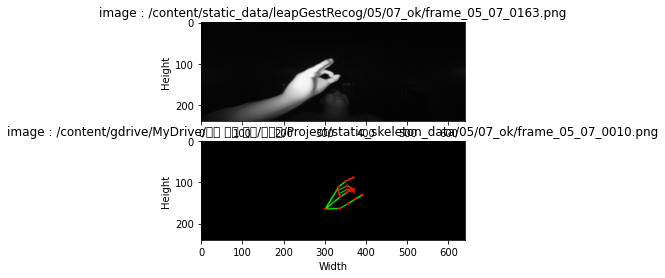

In [ ]:
import cv2

print(new_paths[0])
def img_plot(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ('Shape : ', img.shape)

  plt.grid(False)
  plt.imshow(img)
  plt.xlabel('Width')
  plt.ylabel('Height')
  plt.title('image : ' + img_path)

plt.subplot(211)
img_plot(imagepaths[0]) # 전처리 전 kaggle data

plt.subplot(212)
img_plot(new_paths[0]) # 전처리 후 kaggle data

## Training

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

In [ ]:
# Creating training set and labels
X = []
y = []

print(new_paths[0])
for path in new_paths[:]:
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128,128))
  X.append(img)

  # image 경로에서 label 추출
  category = path.split('/')[9] # 9번째가 label! (07_ok)
  label = int(category.split('_')[0][1])
  y.append(label)

# X, y를 numpy array로 바꿈
X = np.array(X)
X = X.reshape(len(new_paths[:]), 128, 128, 1)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], new_paths[0])

/content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png
Images loaded:  13235
Labels loaded:  13235
7 /content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png


In [ ]:
# Test train split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=15, batch_size=64, verbose=2, validation_data=(X_val, y_val))

Epoch 1/15
166/166 - 300s - loss: 0.1839 - accuracy: 0.9444 - val_loss: 0.1953 - val_accuracy: 0.9350
Epoch 2/15
166/166 - 299s - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.1389 - val_accuracy: 0.9637
Epoch 3/15
166/166 - 299s - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0801 - val_accuracy: 0.9751
Epoch 4/15
166/166 - 300s - loss: 0.0432 - accuracy: 0.9853 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 5/15
166/166 - 299s - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.1292 - val_accuracy: 0.9675
Epoch 6/15
166/166 - 299s - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0777 - val_accuracy: 0.9792
Epoch 7/15
166/166 - 299s - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0907 - val_accuracy: 0.9792
Epoch 8/15
166/166 - 299s - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0905 - val_accuracy: 0.9754
Epoch 9/15
166/166 - 298s - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 10/15
166/166 - 298s - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.1221 - 

* result

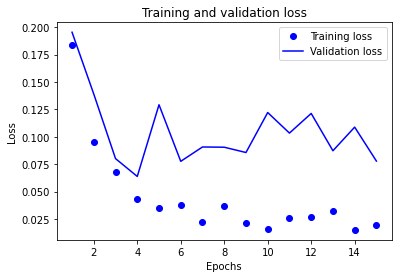

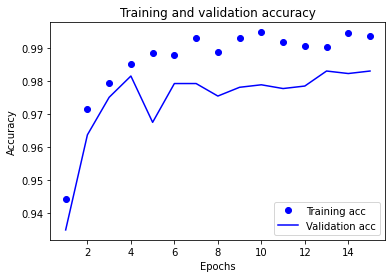

In [ ]:
# plotting
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# save
model.save('/content/gdrive/MyDrive/trained_kaggle/trained_kaggledata.h5')

## Testing

* 직접 만든 데이터로 test 진행

In [ ]:
# test data
X_test = []
y_test = []

test_paths = []

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/10'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      test_paths.append(path)

print(len(test_paths))
print(test_paths[len(test_paths)-1])

for path in test_paths[:]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128,128))
  X_test.append(img)
  if len(X_test) % 100 == 0 or len(X_test) == len(test_paths):
    print('number of X test data : ', len(X_test))

  # labels
  category = path.split('/')[5]
  label = int(category.split('_')[0][1])
  y_test.append(label)

X_test = np.array(X_test)
X_test = X_test.reshape(len(test_paths), 128, 128, 1)
y_test = np.array(y_test)

print('test 이미지 개수 : ', len(X_test))
print('test 라벨 개수 : ', len(y_test))
print(y_test[0], test_paths[0])

2347
/content/gdrive/MyDrive/10/09_c/frame_00_09_0290.png
number of X test data :  100
number of X test data :  200
number of X test data :  300
number of X test data :  400
number of X test data :  500
number of X test data :  600
number of X test data :  700
number of X test data :  800
number of X test data :  900
number of X test data :  1000
number of X test data :  1100
number of X test data :  1200
number of X test data :  1300
number of X test data :  1400
number of X test data :  1500
number of X test data :  1600
number of X test data :  1700
number of X test data :  1800
number of X test data :  1900
number of X test data :  2000
number of X test data :  2100
number of X test data :  2200
number of X test data :  2300
number of X test data :  2347
test 이미지 개수 :  2347
test 라벨 개수 :  2347
1 /content/gdrive/MyDrive/10/01_palm/frame_00_01_0002.png


In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 16s 221ms/step - loss: 13.8318 - accuracy: 0.2318
Test accuracy : 23.1785%


# 2. Webcam을 통해 직접 만든 data로 training

## Data upload

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

* mount drive

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


* 이미지의 경로를 skeletonpaths list에 저장

In [ ]:
dir_path = '/content/gdrive/MyDrive/static_skeleton_data'
skeletonpaths = []

for dirname, _, filenames in os.walk(dir_path):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    
    if path.endswith("png"):
      skeletonpaths.append(path)

print(len(skeletonpaths))
print(skeletonpaths[0])

7838
/content/gdrive/MyDrive/static_skeleton_data/12/01_palm/frame_00_12_0001.png


## Training

* X, y 변수 생성

In [ ]:
# Creating trainig set and labels
X_made = []
y_made = []

for path in skeletonpaths[:len(skeletonpaths)]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128, 128))
  X_made.append(img)
  if len(X_made) % 100 == 0 or len(X_made) == len(skeletonpaths):
    print(len(X_made))

  # labels
  category = path.split("/")[6] # path에서 6번째가 label
  label = int(category.split("_")[0][1])
  y_made.append(label)

X_made = np.array(X_made)
X_made = X_made.reshape(len(skeletonpaths), 128, 128, 1)
y_made = np.array(y_made)

print("이미지 개수 : ", len(X_made))
print("라벨 개수 : ", len(y_made))
print(y_made[0], skeletonpaths[0])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7838
이미지 개수 :  7838
라벨 개수 :  7838
1 /content/gdrive/MyDrive/static_skeleton_data/12/01_palm/frame_00_12_0001.png


* 생성한 변수 (X, y) 저장

In [ ]:
# data 저장
np.save('/content/gdrive/MyDrive/made/input_data_made.npy', X_made)
np.save('/content/gdrive/MyDrive/made/label_data_made.npy', y_made)

# 저장 잘 됐는지 확인
X_made_ = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')

print(np.array_equal(X_made, X_made_)) # array가 같은지 확인

True


In [ ]:
# 저장한 image data 불러오기
X_made = []
y_made = []
X_made = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')
y_made = np.load('/content/gdrive/MyDrive/made/label_data_made.npy')

print(len(X_made))
print(len(y_made))

print(X_made.shape)

7838
7838
(7838, 128, 128, 1)


* training

In [ ]:
# test train split
X_train_made, X_val_made, y_train_made, y_val_made = train_test_split(X_made, 
                                                                      y_made, 
                                                                      test_size = 0.2, 
                                                                      random_state=10)

# model
model_made = Sequential()
model_made.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(64, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Flatten())
model_made.add(Dropout(0.3)) # dropout
model_made.add(Dense(128, activation='relu'))
model_made.add(Dense(10, activation='softmax'))

model_made.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
model_made.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_made = model_made.fit(X_train_made, y_train_made, epochs=10, batch_size=64,
                              verbose=2, validation_data=(X_val_made, y_val_made))

Epoch 1/10
98/98 - 210s - loss: 1.4748 - accuracy: 0.5273 - val_loss: 0.4089 - val_accuracy: 0.8705
Epoch 2/10
98/98 - 193s - loss: 0.3373 - accuracy: 0.8839 - val_loss: 0.2341 - val_accuracy: 0.9369
Epoch 3/10
98/98 - 193s - loss: 0.1478 - accuracy: 0.9533 - val_loss: 0.1255 - val_accuracy: 0.9643
Epoch 4/10
98/98 - 192s - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.1254 - val_accuracy: 0.9617
Epoch 5/10
98/98 - 192s - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 6/10
98/98 - 193s - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.0953 - val_accuracy: 0.9732
Epoch 7/10
98/98 - 194s - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.1301 - val_accuracy: 0.9681
Epoch 8/10
98/98 - 194s - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.1225 - val_accuracy: 0.9739
Epoch 9/10
98/98 - 195s - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0941 - val_accuracy: 0.9739
Epoch 10/10
98/98 - 195s - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0770 - val_accuracy: 0.9783

* result

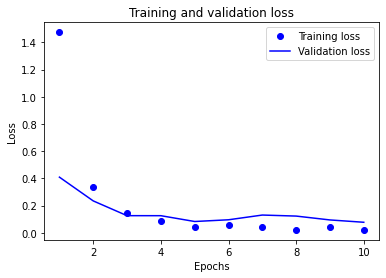

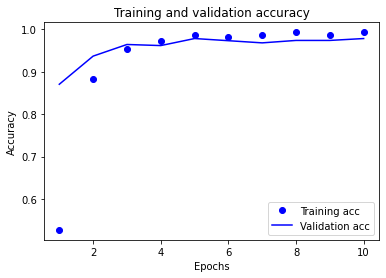

In [ ]:
# plotting
loss = history_made.history['loss']
val_loss = history_made.history['val_loss']
acc = history_made.history['accuracy']
val_acc = history_made.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* model save

In [ ]:
# model save
model_made.save('/content/gdrive/MyDrive/made/model_made.h5')

## Testing

* 직접 만든 데이터로 test 진행

In [ ]:
# test data
X_test = []
y_test = []

test_paths = []

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/10'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      test_paths.append(path)

#print(len(test_paths))
#print(test_paths[len(test_paths)-1])

for path in test_paths[:]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128,128))
  X_test.append(img)
  if len(X_test) % 100 == 0 or len(X_test) == len(test_paths):
    print(len(X_test))

  # labels
  category = path.split('/')[5]
  label = int(category.split('_')[0][1])
  y_test.append(label)

X_test = np.array(X_test)
X_test = X_test.reshape(len(test_paths), 128, 128, 1)
y_test = np.array(y_test)

print('test 이미지 개수 : ', len(X_test))
print('test 라벨 개수 : ', len(y_test))
print(y_test[0], test_paths[0])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2347
test 이미지 개수 :  2347
test 라벨 개수 :  2347
1 /content/gdrive/MyDrive/10/01_palm/frame_00_01_0002.png


In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model_made.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 18s 247ms/step - loss: 1.2946 - accuracy: 0.7559
Test accuracy : 75.5859%


# 3. 직접 만든 data에 Augmentation 적용 후 training

## Data upload

* mount drive

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import callbacks

In [ ]:
# 저장했던 data load
X_aug = []
y_aug = []
X_aug = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')
y_aug = np.load('/content/gdrive/MyDrive/made/label_data_made.npy')

print(len(X_aug))
print(len(y_aug))
print(X_aug.shape)

7838
7838
(7838, 128, 128, 1)


In [ ]:
# test train split
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_aug,
                                                                  y_aug,
                                                                  test_size = 0.1,
                                                                  random_state=10)

# model
model_aug = Sequential()
model_aug.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(128, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(128, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Flatten())
model_aug.add(Dropout(0.3))
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dense(10, activation='softmax'))

model_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

## Data augmentation

* 사람마다 폴더로 나눠져있으므로, 폴더별로 augmentation data를 생성한 후 MergeDI class를 이용하여 합함

In [ ]:
# DirectoryIterator (train_generator) 합치기
class MergeDI():
    def __init__(self, *gens):
        self.gens = gens

    def generate(self):
        while True:
            for g in self.gens:
                yield next(g)

    def __len__(self):
        return sum([len(g) for g in self.gens])

In [ ]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20, # range 내에서 random하게 data 회전시킴
                             width_shift_range=0.1, # range 내에서 translation
                             height_shift_range=0.1, # range 내에서 translation
                             shear_range=0.1, # range 내에서 affine
                             zoom_range=0.1, # range 내에서 zoom
                             horizontal_flip=False, # 거울모드는 오른손만 detecting해야하므로 false
                             fill_mode='nearest', # 빈 공간을 채울 방법 : 가장 가까운 값
                             validation_split=0.1) # validation split 가능

test_datagen = ImageDataGenerator(rescale=1./255) # test 시에는 변화 x

train_generator_12 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/12',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

train_generator_13 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/13',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

train_generator_14 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/14',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

validation_generator_12 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/12',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

validation_generator_13 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/13',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

validation_generator_14 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/14',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

train_generator = MergeDI(train_generator_12, train_generator_13, train_generator_14)
validation_generator = MergeDI(validation_generator_12, validation_generator_13, validation_generator_14)

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/10',
                                                  color_mode='grayscale',
                                                  batch_size=32,
                                                  target_size=(128,128))

print(len(train_generator_12))
print(len(train_generator_13))
print(len(train_generator_14))
print(len(train_generator))
print(len(validation_generator_12))
print(len(validation_generator_13))
print(len(validation_generator_14))
print(len(validation_generator))
print(len(test_generator))

Found 2366 images belonging to 10 classes.
Found 2342 images belonging to 10 classes.
Found 2139 images belonging to 10 classes.
Found 257 images belonging to 10 classes.
Found 257 images belonging to 10 classes.
Found 232 images belonging to 10 classes.
Found 2347 images belonging to 10 classes.
74
74
67
215
9
9
8
26
74


* 첫 번째 input data (image)에 대한 augmentation 결과

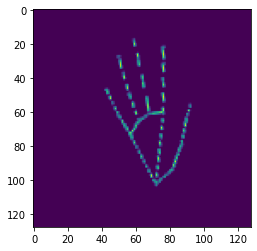

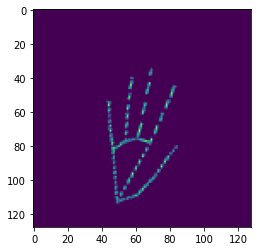

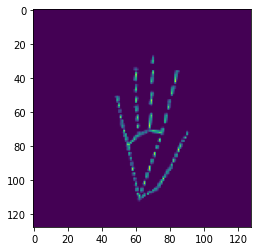

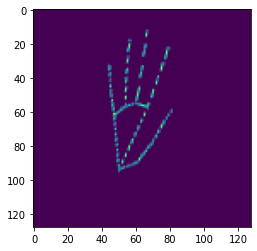

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x_augmentation = X_aug[0].reshape((1,) + X_aug[0].shape) # 첫 번째 axis 추가 : batch

i=0
for batch in train_datagen.flow(x_augmentation, batch_size=1):
  # 주어진 x에서 batch size만큼 꺼낸 후 전처리 수행하여 return
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0: break # 4번 

## Training

* steps_per_epoch = train data 개수 (6847) / batch size (32) = 약 215
* validation_steps = validation data 개수 (746) / batch size (32) = 약 24

In [ ]:
callbacks_list = [callbacks.EarlyStopping(monitor='accuracy',
                                          patience=5)]

model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit_generator(train_generator.generate(),
                                      steps_per_epoch=215, epochs=20,
                                      callbacks=callbacks_list,
                                      validation_data=validation_generator.generate(), validation_steps=24)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
215/215 [==============================] - 2334s 11s/step - loss: 1.9401 - accuracy: 0.2925 - val_loss: 1.0278 - val_accuracy: 0.6546
Epoch 2/20
215/215 [==============================] - 75s 349ms/step - loss: 0.6982 - accuracy: 0.7461 - val_loss: 0.5356 - val_accuracy: 0.8275
Epoch 3/20
215/215 [==============================] - 47s 222ms/step - loss: 0.3840 - accuracy: 0.8687 - val_loss: 0.5943 - val_accuracy: 0.8226
Epoch 4/20
215/215 [==============================] - 47s 219ms/step - loss: 0.2868 - accuracy: 0.9090 - val_loss: 0.3416 - val_accuracy: 0.9106
Epoch 5/20
215/215 [==============================] - 47s 218ms/step - loss: 0.2149 - accuracy: 0.9278 - val_loss: 0.3701 - val_accuracy: 0.8783
Epoch 6/20
215/215 [==============================] - 46s 217ms/step - loss: 0.1837 - accuracy: 0.9409 - val_loss: 0.3365 - val_accuracy: 0.8988
Epoch 7/20
215/215 [==============================] - 46s 213ms/step - loss: 0.1302 - accuracy: 0.9589 - val_loss: 0.2227 - val_ac

* result

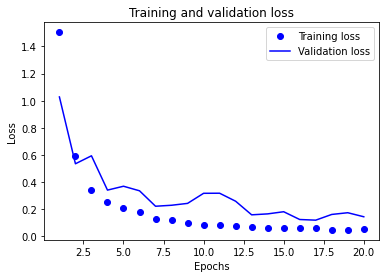

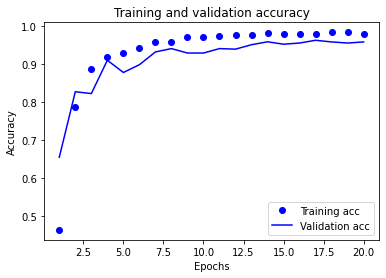

In [ ]:
# plotting
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* model save

In [ ]:
# model save
model_aug.save('/content/gdrive/MyDrive/model_new/model_made_augmentation.h5')

## Testing

* Test data의 경우 위에서 ImageDataGenerator로 생성했음
* steps : test data 개수 (2347) / batch size (32) = 약 75

In [ ]:
# loss and accuracy on test 
test_loss, test_acc = model_aug.evaluate_generator(test_generator)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy : 88.7942%
